In [6]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [5]:
def load_image_grayscale(path):
    img = Image.open(path).convert('L')  # Convert to grayscale
    img_np = np.array(img).astype(np.float32) / 255.0  # Normalize to [0, 1]
    return img_np

In [3]:

# Define grid spacing
dy = 159  # y-direction (vertical)
dx = 213  # x-direction (horizontal)

# Generate coordinates centered around 0
y = np.arange(-3.5, 4.5) * dy  # 8 values
x = np.arange(-3.5, 4.5) * dx  # 8 values

# Create meshgrid
xx, yy = np.meshgrid(x, y)

# Stack and reshape into (1, 64, 2)
grid_points = np.stack([xx.ravel(), yy.ravel()], axis=1)  # (64, 2)
grid_3d = grid_points[None, :, :]  # (1, 64, 2)

# grid_3d is the final array
print(grid_3d.shape)  # (1, 64, 2)


(1, 64, 2)


In [20]:
grid_3d

array([[[-745.5, -556.5],
        [-532.5, -556.5],
        [-319.5, -556.5],
        [-106.5, -556.5],
        [ 106.5, -556.5],
        [ 319.5, -556.5],
        [ 532.5, -556.5],
        [ 745.5, -556.5],
        [-745.5, -397.5],
        [-532.5, -397.5],
        [-319.5, -397.5],
        [-106.5, -397.5],
        [ 106.5, -397.5],
        [ 319.5, -397.5],
        [ 532.5, -397.5],
        [ 745.5, -397.5],
        [-745.5, -238.5],
        [-532.5, -238.5],
        [-319.5, -238.5],
        [-106.5, -238.5],
        [ 106.5, -238.5],
        [ 319.5, -238.5],
        [ 532.5, -238.5],
        [ 745.5, -238.5],
        [-745.5,  -79.5],
        [-532.5,  -79.5],
        [-319.5,  -79.5],
        [-106.5,  -79.5],
        [ 106.5,  -79.5],
        [ 319.5,  -79.5],
        [ 532.5,  -79.5],
        [ 745.5,  -79.5],
        [-745.5,   79.5],
        [-532.5,   79.5],
        [-319.5,   79.5],
        [-106.5,   79.5],
        [ 106.5,   79.5],
        [ 319.5,   79.5],
        [ 53

In [9]:


def load_image_grayscale(path):
    img = Image.open(path).convert('L')  # Convert to grayscale
    img_np = np.array(img).astype(np.float32) / 255.0  # Normalize to [0, 1]
    return img_np

# Set the folder path and extension
folder_path = r"C:\Users\beery\OneDrive\桌面\Study\SoSe 2025 Jena\Imip\Captured photos\01.07.25"
file_extension = '.jpg'  # or '.jpg', etc.

# Load images in the specified order
image_list = []

for x in range(8):
    for y in range(8):
        filename = f'led_r{x}_c{y}{file_extension}'
        filepath = os.path.join(folder_path, filename)
        img = load_image_grayscale(filepath)
        image_list.append(img)


In [11]:
def display_low_res_images(images, grid_size):
    rows, cols = grid_size
    fig, axs = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))
    for i in range(rows):
        for j in range(cols):
            idx = i * cols + j
            axs[i, j].imshow(images[idx], cmap='gray')
            axs[i, j].axis('off')
            axs[i, j].set_title(f'Patch ({i},{j})')
    plt.tight_layout()
    plt.show()


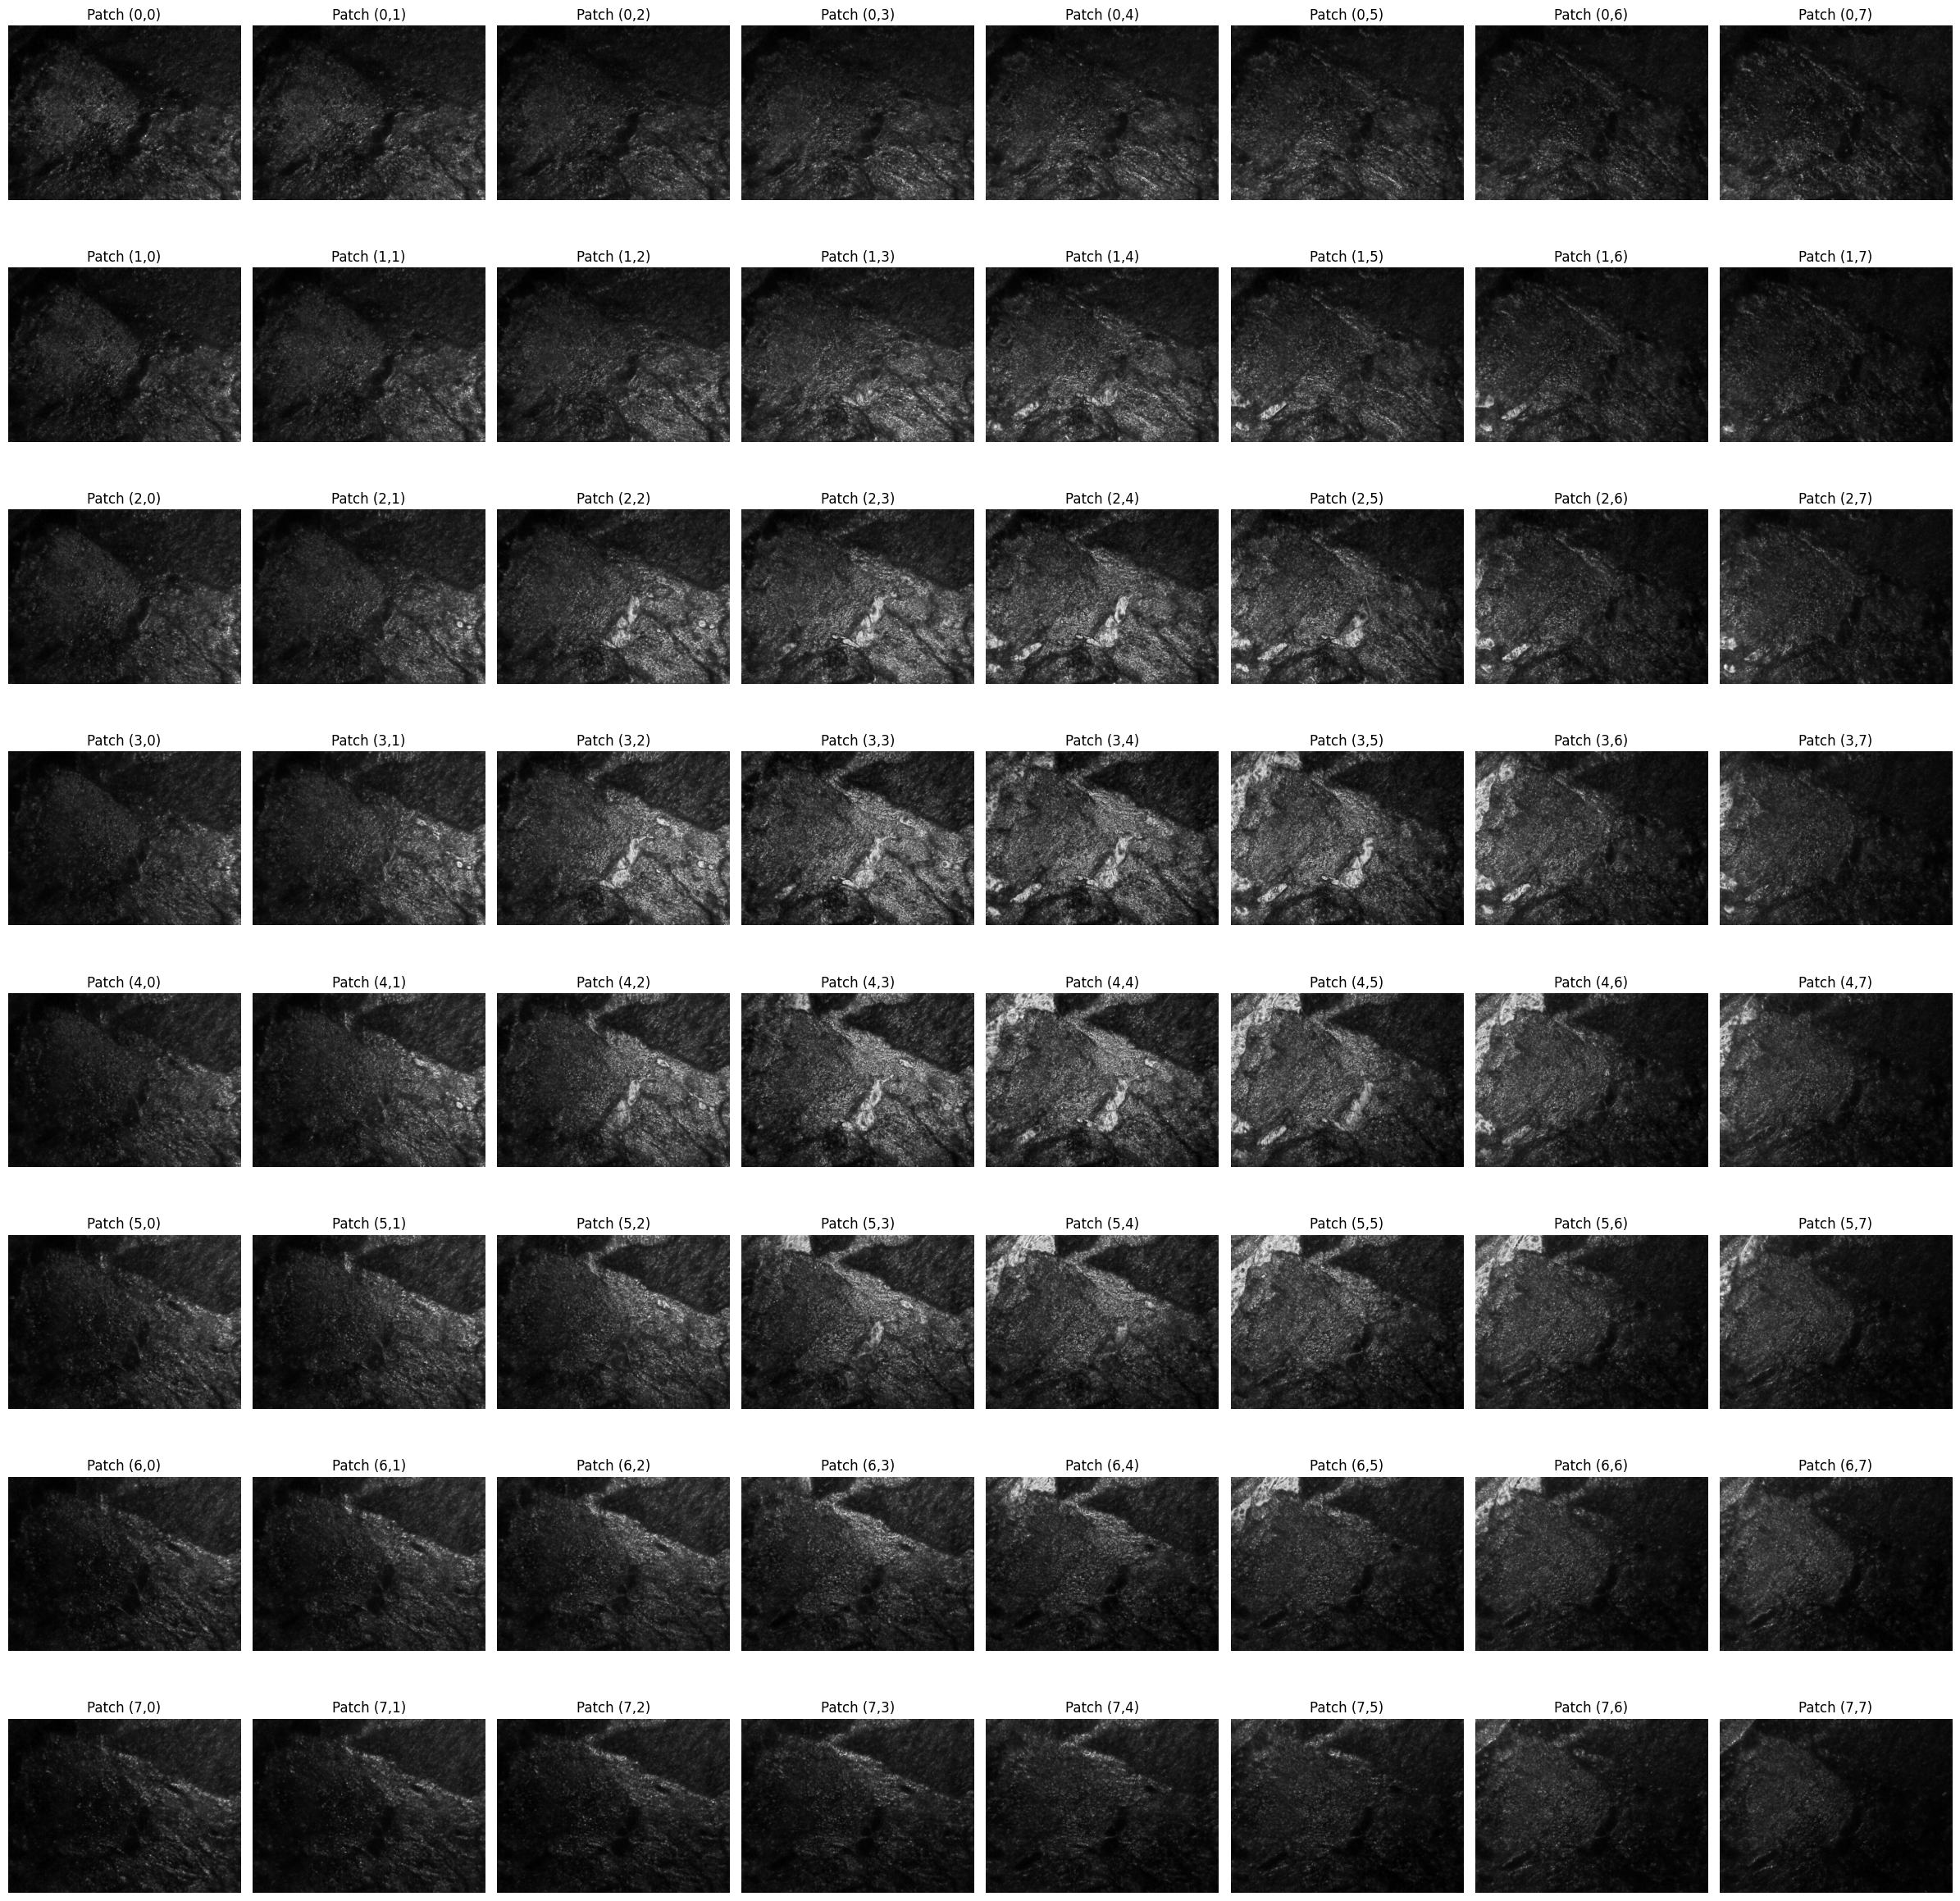

In [12]:
grid_size = (8, 8)  # 8x8 grid
# Display reconstructed images
display_low_res_images(image_list, grid_size)

In [26]:
image_list[1].shape

(480, 640)

Text(0.5, 1.0, 'Image at index 36')

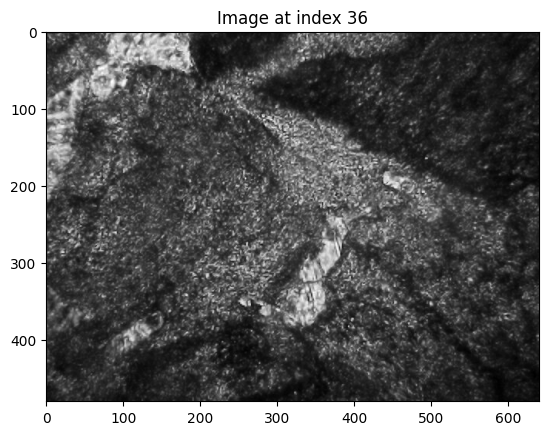

In [31]:
#cisualize a chosen image
index= 36  # Change this to visualize a different image
chosen_image = image_list[index]
plt.imshow(chosen_image, cmap='gray')
plt.title(f'Image at index {index}')

In [13]:
stacked_images = np.stack(image_list, axis=-1)
stacked_images.shape

(480, 640, 64)

In [14]:
%load_ext autoreload
%autoreload 2
import Main_functions
from Main_functions import AlterMin

| iter |  rmse    |
--------------------
|  0   | inf |
|  1   | 1.79e+06 |
|  2   | 6.80e+04 |
|  3   | 6.28e+04 |
|  4   | 5.83e+04 |
|  5   | 5.46e+04 |
|  6   | 5.14e+04 |
|  7   | 4.88e+04 |
|  8   | 4.64e+04 |
|  9   | 4.44e+04 |
| 10   | 4.26e+04 |
| 11   | 4.11e+04 |
| 12   | 3.97e+04 |
| 13   | 3.86e+04 |
| 14   | 3.76e+04 |
| 15   | 3.68e+04 |
| 16   | 3.61e+04 |
| 17   | 3.56e+04 |
| 18   | 3.52e+04 |
| 19   | 3.49e+04 |
| 20   | 3.47e+04 |
| 21   | 3.47e+04 |
| 22   | 3.48e+04 |


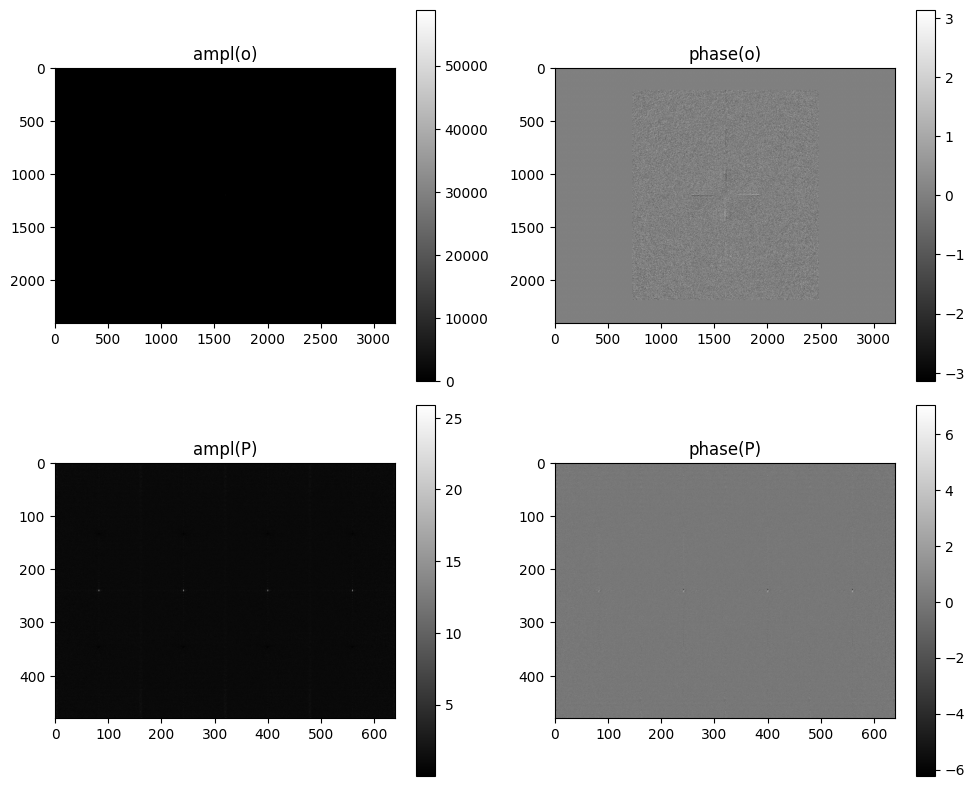

elapsed time: 148 seconds


In [24]:
# Stepsize 0.001
# Alpha Beta are both 10
dim=[2400, 3200]
O, P, err, scale, Ns = AlterMin(stacked_images, dim, grid_3d, {})


Text(0.5, 1.0, 'Optimized Image')

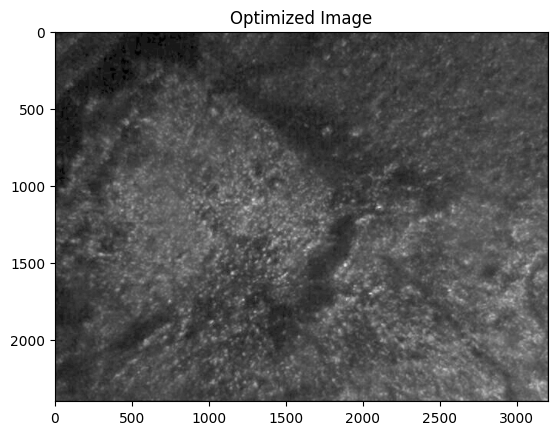

In [25]:
o_image=np.fft.ifft2(O)
plt.imshow(np.abs(o_image), cmap='gray')
# Display the optimized image
plt.title("Optimized Image")

In [21]:
o_image.shape

(2400, 1800)